# Training a CNN model for Hand Gesture Recognition

### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import os

## Gestures List

In [2]:
gestures = ['fist', 'palm', 'swing']
test_data_dir = 'data/test'
train_data_dir = 'data/train'

Segmenting train data

In [3]:
train_Images = []
no_train_images = 1000

for gesture in gestures:
    for i in range(0, no_train_images):
        # print(train_data_dir + '/' + gesture + '/' + gesture + '_' + str(i) + '.png')
        image = cv2.imread(train_data_dir + '/' + gesture + '/' + gesture + '_' + str(i) + '.png')
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        train_Images.append(gray_image.reshape(89, 100, 1))

In [4]:
train_Labels = []
no_train_images = 1000

for i in range(0, len(gestures)):
    vect = [0] * len(gestures)
    vect[i] = 1
    for j in range(0, no_train_images):
        train_Labels.append(vect)

Segmenting test data

In [5]:
test_Images = []
no_test_images = 100

for gesture in gestures:
    for i in range(0, no_test_images):
        # print(train_data_dir + '/' + gesture + '/' + gesture + '_' + str(i) + '.png')
        image = cv2.imread(train_data_dir + '/' + gesture + '/' + gesture + '_' + str(i) + '.png')
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        test_Images.append(gray_image.reshape(89, 100, 1))

In [6]:
test_Labels = []
no_test_images = 100

for i in range(0, len(gestures)):
    vect = [0] * len(gestures)
    vect[i] = 1
    for j in range(0, no_test_images):
        test_Labels.append(vect)

In [7]:
print("Training Images: " + str(len(train_Images)))
print("Training Labels: " + str(len(train_Labels)))
print("Testing Images: " + str(len(test_Images)))
print("Testing Labels: " + str(len(test_Labels)))

Training Images: 3000
Training Labels: 3000
Testing Images: 300
Testing Labels: 300


## Using GPU for faster processing

In [8]:
#
method1 = False

if method1:
    import os
    os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
    tf.compat.v1.reset_default_graph()
    gpu_options.allow_growth = True
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

#
method2 = False

if method2:
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.7
    tf.compat.v1.keras.backend.set_session(
        tf.compat.v1.Session(config=config))

# 
method3 = False

if method3:
    physical_devices = tf.config.list_physical_devices('GPU')
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

### Transforming the input data

In [9]:
train_Images = np.array(train_Images)
train_Labels = np.array(train_Labels)
test_Images = np.array(test_Images)
test_Labels = np.array(test_Labels)

## Making CNN Model

In [10]:
tf.compat.v1.reset_default_graph()
model = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, activation='relu', kernel_size = (2,2), input_shape = (89,100,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, activation='relu', kernel_size = (2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation='relu', kernel_size = (2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 256, activation='relu', kernel_size = (2,2)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout((0.40)),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout((0.40)),
    # layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 88, 99, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 23, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 10, 256)        1

### Training

In [11]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Shuffle Training Data
train_Images, train_Labels = shuffle(train_Images, train_Labels, random_state=0)

from keras import callbacks 
earlystopping  = callbacks.EarlyStopping(monitor = "val_accuracy" ,mode = "max" , patience = 5 , restore_best_weights = True)
history = model.fit(train_Images, train_Labels, epochs=50, validation_data = (test_Images, test_Labels), callbacks = [earlystopping])


Epoch 1/50
94/94 [==============================] - 24s 252ms/step - loss: 1.3773 - accuracy: 0.9583 - val_loss: 3.9051e-05 - val_accuracy: 1.0000
Epoch 2/50
94/94 [==============================] - 24s 260ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 8.8370e-07 - val_accuracy: 1.0000
Epoch 3/50
94/94 [==============================] - 23s 244ms/step - loss: 6.7670e-06 - accuracy: 1.0000 - val_loss: 2.0027e-07 - val_accuracy: 1.0000
Epoch 4/50
94/94 [==============================] - 23s 248ms/step - loss: 2.6911e-05 - accuracy: 1.0000 - val_loss: 2.1458e-08 - val_accuracy: 1.0000
Epoch 5/50
94/94 [==============================] - 24s 259ms/step - loss: 6.3416e-06 - accuracy: 1.0000 - val_loss: 1.5895e-09 - val_accuracy: 1.0000
Epoch 6/50
94/94 [==============================] - 27s 291ms/step - loss: 6.5109e-07 - accuracy: 1.0000 - val_loss: 1.1921e-09 - val_accuracy: 1.0000


### Saving Model

In [12]:
if not os.path.isdir('TrainedModel'):
    os.mkdir('TrainedModel')
model.save('./TrainedModel/')

INFO:tensorflow:Assets written to: ./TrainedModel/assets


## Model Sumary

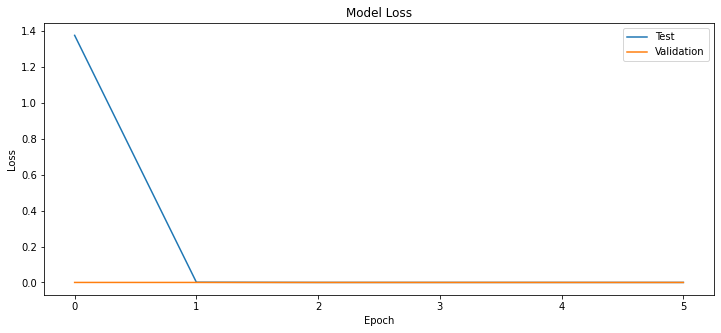

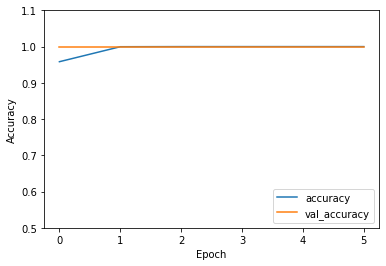

In [13]:
plt.figure(figsize = (12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')